In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [208]:
#218 bead spacings alternate between 10 and 15 nm
#217 bead spacings are all 25 nm
#213 bead spacings are all 15 nm
#210 bead spacings alternate between 15 and 25 nm, 1000 snapshots
simulation_number = 218
snapshot_number = 99
#comparing correlations relative to the vectors at the given bead 
inital_comparison_location = 0

In [209]:
 df = pd.read_csv("/Users/angelikahirsch/Documents/chromo/output" + "/sim_" + str(simulation_number) + "/poly_1-" + str(snapshot_number)+ ".csv")

In [210]:
t1 = []
for i in range(len(df)):
    t2coordinates = np.array([df.iloc[i, 7], df.iloc[i, 8], df.iloc[i, 9]])
    t3coordinates = np.array([df.iloc[i, 4], df.iloc[i, 5], df.iloc[i, 6]])
    t1coordinates = np.cross(t2coordinates, t3coordinates)
    t1.append(t1coordinates)
df["t1"] = t1

In [211]:
def vector_magnitude(vector):
    return np.linalg.norm(vector)

def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    magnitude_product = vector_magnitude(vector1) * vector_magnitude(vector2)
    return dot_product / magnitude_product


In [212]:
def t1function(df):
    correlations_t1 = []
    for i in range(len(df)):
        end_point_1 = df["t1"][inital_comparison_location]
        end_point_2 = df["t1"][i]
        start_point_r1 = np.array([df.iloc[inital_comparison_location, 1], df.iloc[inital_comparison_location, 2], df.iloc[inital_comparison_location, 3]])
        start_point_r2 = np.array([df.iloc[i, 1], df.iloc[i, 2], df.iloc[i, 3]])
        
        vector1 = end_point_1 - start_point_r1
        vector2 = end_point_2 - start_point_r2
        
        correlation = cosine_similarity(vector1, vector2)
        correlations_t1.append(correlation)
    return np.array(correlations_t1)

In [213]:
def t3function(df):
    correlations_t3 = []
    for i in range(len(df)):
        end_point_1 = np.array([df.iloc[inital_comparison_location, 4], df.iloc[inital_comparison_location, 5], df.iloc[inital_comparison_location, 6]])
        end_point_2 = np.array([df.iloc[i, 4], df.iloc[i, 5], df.iloc[i, 6]])
        start_point_r1 = np.array([df.iloc[inital_comparison_location, 1], df.iloc[inital_comparison_location, 2], df.iloc[inital_comparison_location, 3]])
        start_point_r2 = np.array([df.iloc[i, 1], df.iloc[i, 2], df.iloc[i, 3]])
        
        vector1 = end_point_1 - start_point_r1
        vector2 = end_point_2 - start_point_r2
        
        correlation = cosine_similarity(vector1, vector2)
        correlations_t3.append(correlation)
    return np.array(correlations_t3)

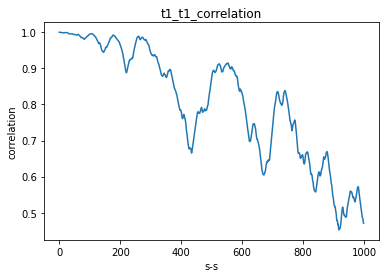

In [214]:
plt.plot(t1function(df))
# Add labels and title
plt.xlabel("s-s")
plt.ylabel('correlation')
plt.title('t1_t1_correlation')

# Display the plot
plt.show()

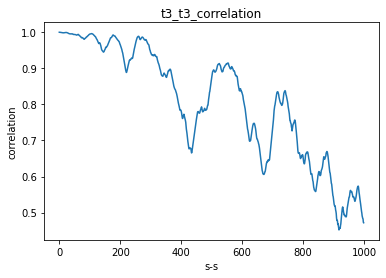

In [215]:
plt.plot(t3function(df))

# Add labels and title
plt.xlabel("s-s")
plt.ylabel('correlation')
plt.title('t3_t3_correlation')

# Display the plot
plt.show()

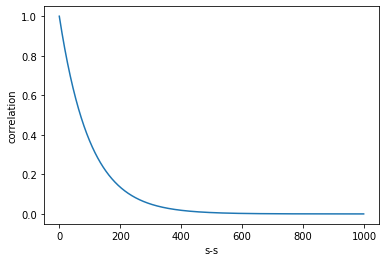

In [216]:
# What the t1 and t3 correlations should theoretically look like
lt = 100
lp = 100
x = df. iloc[:,0]
y = []
for i in range(len(x)):
    new_y = -1 * (x[i]/lt)
    new_y = np.exp(new_y)
    y.append(new_y)
    
plt.plot(y)
plt.xlabel("s-s")
plt.ylabel('correlation')

# Display the plot
plt.show()
            